<a href="https://colab.research.google.com/github/dyammanuru/TDI_Twins_ID/blob/main/FirstSteps_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run some setup code for this notebook.

from google.colab import drive

#drive.mount('/dyammanuru')

#drive.mount('/content/drive')
drive.mount("/dyammanuru", force_remount=True)

Mounted at /dyammanuru


In [ ]:
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Google_Drive_logo.png/600px-Google_Drive_logo.png' height="50" alt="Gdrive logo"/></center>
#@markdown <center><h3>Mount Gdrive to /content/drive</h3></center><br>
#MODE = "UNMOUNT" #@param ["MOUNT", "UNMOUNT"]

#Mount your Gdrive! 

#from google.colab import drive
#drive.mount._DEBUG = False
#if MODE == "MOUNT":
#  drive.mount('/dyammanuru', force_remount=True)
#elif MODE == "UNMOUNT":
#  try:
#    drive.flush_and_unmount()
#  except ValueError:
#    pass
#  get_ipython().system_raw("rm -rf /root/.config/Google/DriveFS") 

In [ ]:
# MyDrive is required in the below path as it points to the Google Drive, other names won't work
%cd /dyammanuru/MyDrive

# List files to make sure we're in the expected directory.
# Your output will look different, showing your own Drive files here.
!ls

/dyammanuru/MyDrive
 AWS_Overview.pdf
 AWS_training_links.txt
 Cloud_Computing_Concepts_part_1.zip
'Colab Notebooks'
 Diwakar_Aadhaar.jpg
 Diwakar_Address.JPG
 Diwakar_passport_photo.JPG
 Diwakar_Photo_1.JPG
 Diwakar_photo.JPG
 Electricity_Bill_Address_Proof.pdf
'IBM WebSphere DataPower SOA Appliance Handbook.pdf'
 ICE.zip
 links_useful.txt
'Novel - The-Fountainhead_ Ayn_Rand.pdf'
 Taxes_2015_2016_2017.zip
 tech_links.txt
 Twins_ID
 WMB_8


In [ ]:
!pwd

# grant execute permissions to all subfolders/files
!chmod 755 -R Twins_ID/

/dyammanuru/My Drive


In [ ]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
%matplotlib inline

# pytorch provides a function to convert PIL images to tensors.
pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()


/dyammanuru/MyDrive/Twins_ID/Photos/split_photos


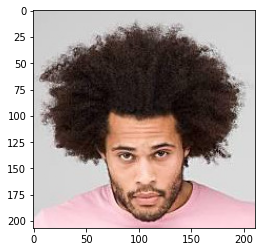

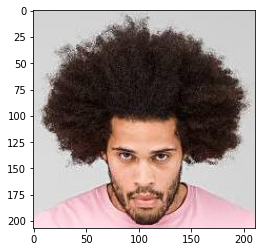

Image type: torch.FloatTensor
Image size: torch.Size([3, 207, 211])


In [ ]:
# Twins (identical) identification
# First Steps - EDA

import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
%matplotlib inline

# pytorch provides a function to convert PIL images to tensors.
pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()

%cd /dyammanuru/MyDrive/Twins_ID/Photos/split_photos

# Read the image from file. Assuming it is in the same directory.
pil_image = Image.open('download_A_1.jpg')
rgb_image = pil2tensor(pil_image)

# read the twin's image
pil_image_twin = Image.open('download_A_2.jpg')
rgb_image_twin = pil2tensor(pil_image_twin)

# Plot the image here using matplotlib.
def plot_image(tensor):
    plt.figure()
    # imshow needs a numpy array with the channel dimension
    # as the the last dimension so we have to transpose things.
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

plot_image(rgb_image)
plot_image(rgb_image_twin)

# Show the image tensor type and tensor size here.
print('Image type: ' + str(rgb_image.type()))
print('Image size: ' + str(rgb_image.size()))

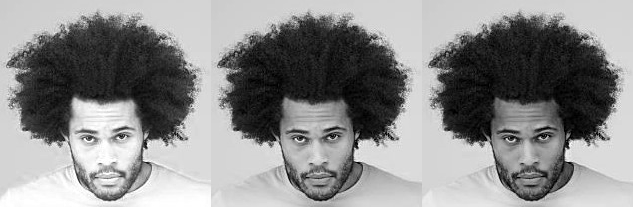

In [ ]:
# slice image into RGB channels

from io import BytesIO
import IPython.display

r_image = rgb_image[0]
g_image = rgb_image[1]
b_image = rgb_image[2]

def show_grayscale_image(tensor):
    # IPython.display can only show images from a file.
    # So we mock up an in-memory file to show it.
    # IPython.display needs a numpy array with channels first.
    # and it also has to be uint8 with values between 0 and 255.
    f = BytesIO()
    a = np.uint8(tensor.mul(255).numpy()) 
    Image.fromarray(a).save(f, 'png')
    IPython.display.display(IPython.display.Image(data = f.getvalue()))

# Cat concatenates tensors along a given dimension, we choose width here (1), instead of height (0).
show_grayscale_image(torch.cat((r_image, g_image, b_image), 1))

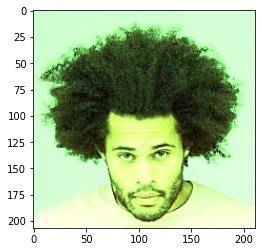

In [ ]:
# enhance one color out of RGB by multiplying this channel by a constant but allwoing it not go beyond [-1,1]

# We need to clone, otherwise both tensors would point to the same object, and we don't want to modify the
# original image as we want to keep working with it later. Always keep this in mind!
image_copy = rgb_image.clone()

# Multiply the green channel by two, clamp the values to the 0-1 range.
image_copy[1] = image_copy[1].mul(2.0).clamp(0.0, 1.0)

# Note: Alternatively we can accomplish the above with an in-place operations.
# Remember that in-place operations in pytorch end with _, not all operations support it.
# but often you want to prefer in-place as you don't need extra memory. See below:
#
# image_copy[1].mul_(2).clamp_(0, 1)
#

# Plot the image_copy.
plot_image(image_copy)
# Try, enhacing the other channels!

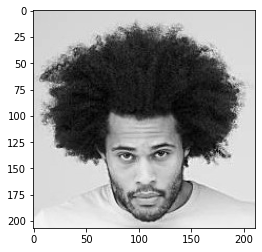

In [ ]:
# convert to gray scale by averaging all three RGB channels
# divide by 3, since each channel has values between 0 and 1, we want to make sure the resulting grayscale image also has values between 0 and 1.

r_image = rgb_image[0]
g_image = rgb_image[1]
b_image = rgb_image[2]

grayscale_image = (r_image + g_image + b_image).div(3.0)

def plot_grayscale_image(tensor):
    plt.figure()
    plt.imshow(tensor.numpy(), cmap = 'gray')
    plt.show()
    
plot_grayscale_image(grayscale_image)


A better way to convert a color RGB image into a grayscale image is using a weighted average. For instance:
gray_image=0.4∗red_image+0.4∗green_image+0.2∗blue_image

Why? To reproduce better how most humans perceive the images. We do not have the same sensitivity for all three channels, the coefficients reflect this. We are considerbly less sensative to blue. Here is a more detailed exposition about this on wikipedia: https://en.wikipedia.org/wiki/Grayscale#Colorimetric_.28luminance-preserving.29_conversion_to_grayscale

In addition to RGB images, we can represent images as HSV, where each channel corresponds to Hue, Saturation and Value (~lightness) instead. Other color spaces include: HSV, Lab, YUV, etc. Sometimes representing an image in some of these other ways might be more beneficial for a given analysis. For instance if we want to focus only on Hue and Saturation but we do not care too much about Value. PIL has convenient operations to make this transformations.

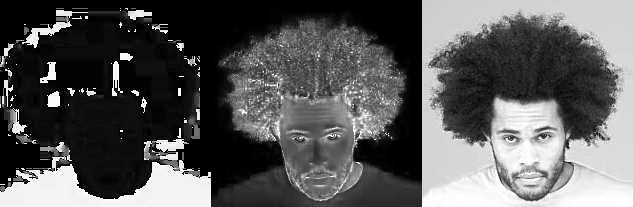

In [ ]:
hsv_image = pil2tensor(pil_image.convert('HSV'))

h_image = hsv_image[0]
s_image = hsv_image[1]
v_image = hsv_image[2]

show_grayscale_image(torch.cat((h_image, s_image, v_image), 1))

Notice how the Hue channel tries to output a flat value for regions that are supposed to be the same color regardless of luminance. The Saturation channel tries to output higher (brighter) values for regions that have more intense colors, and the value channel outputs something similar to the original image. You can also deduce that the RGB color space outputs roughly three different versions of "value" or "luminance". In practice, many modern machine learning and visual recognition models use RGB images directly, and do not take the extra step of converting to other channel spaces because the models are (in a way) robust enough to discover this information on their own.

Brightness:

Making an image brighter is achieved by multiplying the pixels in the image by a scalar bigger than 1 (making sure the values are still between 0 and 1). Conversely, if you multiply the pixels by a scalar between 0 and 1, you make the image darker.

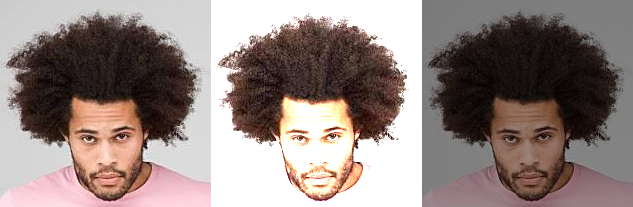

In [ ]:
bright_rgb_image = rgb_image.clone()
dark_rgb_image = rgb_image.clone()

# Multiply all elements in the image by 1.8, and then clamp values between 0 and 1.
bright_rgb_image.mul_(1.8).clamp_(0, 1)

# Multiply all elements in the image by 0.6, and then clamp values between 0 and 1.
dark_rgb_image.mul_(0.6).clamp_(0, 1)

def show_image(tensor):
    f = BytesIO()
    a = np.uint8(tensor.mul(255).numpy().transpose(1, 2, 0)) 
    Image.fromarray(a).save(f, 'png')
    IPython.display.display(IPython.display.Image(data = f.getvalue()))

# Since these are color images (0: channels, 1: height, 2: width), we need to concat in the 2nd dimension. 
show_image(torch.cat((rgb_image, bright_rgb_image, dark_rgb_image), 2))

Histograms:

Histograms are useful because while images can be of different sizes, but histograms can be computed to be of the same size regardless of the image sizes. Additionally we can normalize histograms so they sum to 1, or their ℓ2 norm is 1 (euclidean norm, Frobenius norm in matrices).

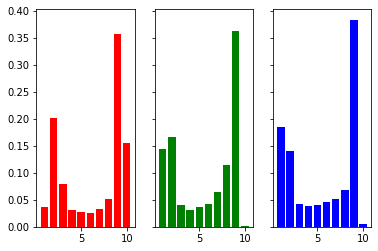

In [ ]:
r_image = rgb_image[0]
g_image = rgb_image[1]
b_image = rgb_image[2]

# Compute histograms for each channel.
hist_r = torch.histc(r_image, bins = 10, min = 0.0, max = 1.0)
hist_g = torch.histc(g_image, bins = 10, min = 0.0, max = 1.0)
hist_b = torch.histc(b_image, bins = 10, min = 0.0, max = 1.0)

# Normalize the histograms so that they sum to 1.
hist_r = hist_r.div(hist_r.sum())
hist_g = hist_g.div(hist_g.sum())
hist_b = hist_b.div(hist_b.sum())

# Plot the histograms.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True)
ax1.bar(np.linspace(1.0, 10.0, num = 10), hist_r.numpy(), color='r')
ax2.bar(np.linspace(1.0, 10.0, num = 10), hist_g.numpy(), color='g')
ax3.bar(np.linspace(1.0, 10.0, num = 10), hist_b.numpy(), color='b')
fig.show();

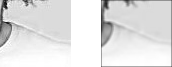

In [ ]:
# Convolutions:
# we will run a convolution on the red channel of the image using a kernel of size 3x3 where all the entries are 1.0 / 9.0.

# The input is just a section of the red channel image.
# We will take the pixels between rows 140:280 and columns 140:500.
input_image = r_image[140:280, 140:500]

# The kernel is a 3x3 matrix that computes the average around the pixel.
kv = 1.0 / 9.0
blur_weights = torch.Tensor([[kv, kv, kv],
                        [kv, kv, kv],
                        [kv, kv, kv]])

# This is a hack, so let's not worry about the details of this implementation. 
# We will learn the meaning of nn.functional, and autograd.Variable later in the class.
# The reason for unsqueezes is because the F.conv2d function is very general, and works
# for multiple images at a time, and multiple channels, and for multiple kernels at a time.
def SingleChannelConvolution(input_image, kernel):
    import torch.nn.functional as F
    from torch.autograd import Variable
    output = F.conv2d(Variable(input_image.unsqueeze(0).unsqueeze(0)), 
                      Variable(kernel.unsqueeze(0).unsqueeze(0)), padding = 1)
    return output.data.squeeze()

# Execute the convolution operation
output = SingleChannelConvolution(input_image, blur_weights)

# Display the output.
padder = torch.ones(input_image.size(0), 30) # Just to leave some space between images.
show_grayscale_image(torch.cat((input_image, padder, output), 1))

Here are other filters that highlight vertical and horizontal edges in the input. These are also sometimes referred to as Sobel operators, and they are also finite differences that approximate the gradients of the image (This is the equivalent to taking a derivative of a function, except that here we have 2D functions in the discrete domain).

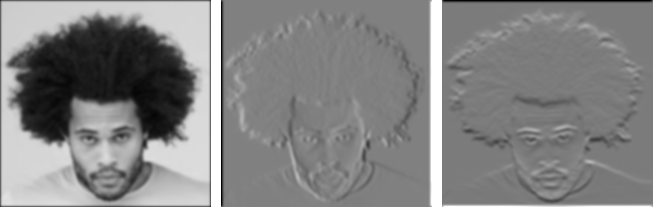

In [ ]:
# The input is the green channel image after a few rounds of blurring.
input_image = SingleChannelConvolution(g_image, blur_weights)
input_image = SingleChannelConvolution(input_image, blur_weights)
input_image = SingleChannelConvolution(input_image, blur_weights)

# The kernel is a 3x3 matrix that computes the Sobel operator.
# See https://en.wikipedia.org/wiki/Sobel_operator
weights = torch.Tensor([[1.0, 0.0, -1.0],
                        [2.0, 0.0, -2.0],
                        [1.0, 0.0, -1.0]])

# Execute the convolution operation for the weights and transposed weights.
output1 = SingleChannelConvolution(input_image, weights)
output2 = SingleChannelConvolution(input_image, weights.t())

# Make sure the images are still between 0 and 1.
output1 = (output1 - output1.min()).div(output1.max() - output1.min())
output2 = (output2 - output2.min()).div(output2.max() - output2.min())

# Display the output.
padder = torch.ones(input_image.size(0), 10) # Just to leave some space between images.
show_grayscale_image(torch.cat((input_image, padder, output1, padder, output2), 1))

In [ ]:
kernel_patch = rgb_image[:, 75:150, 125:150]
print(rgb_image[0])
print(kernel_patch[0])

tensor([[0.7961, 0.7961, 0.7961,  ..., 0.8275, 0.8275, 0.8275],
        [0.7961, 0.7961, 0.7961,  ..., 0.8275, 0.8275, 0.8275],
        [0.7961, 0.7961, 0.7961,  ..., 0.8275, 0.8275, 0.8275],
        ...,
        [0.9922, 0.9961, 0.9922,  ..., 0.9922, 0.9882, 0.9882],
        [0.9922, 0.9922, 0.9961,  ..., 0.9922, 0.9922, 0.9882],
        [1.0000, 0.9961, 0.9961,  ..., 0.9961, 0.9922, 0.9882]])
tensor([[0.1451, 0.1569, 0.1608,  ..., 0.1137, 0.1137, 0.1098],
        [0.1059, 0.1176, 0.1294,  ..., 0.1176, 0.1098, 0.1176],
        [0.0941, 0.1176, 0.1490,  ..., 0.1020, 0.0863, 0.1098],
        ...,
        [0.8824, 0.9059, 0.9294,  ..., 0.4667, 0.8706, 0.8431],
        [0.9255, 0.9412, 0.9569,  ..., 0.4941, 0.8471, 0.8667],
        [0.9412, 0.9451, 0.9529,  ..., 0.7490, 0.9176, 0.8784]])


We could also apply convolutions channel by channel and reconstruct the original image by merging the outputs for each convolution. We could also apply a different kernel to each channel. In fact the kernel matrix could also be an image itself. We will illustrate this below by choosing the person's eyes as the kernel patch:

output1 torch.Size([1, 188, 154])
output2 torch.Size([1, 188, 154])
output3 torch.Size([1, 188, 154])
output torch.Size([3, 188, 154])
rgb_image torch.Size([3, 207, 211])


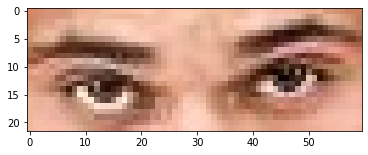

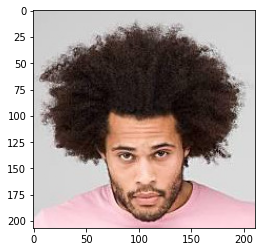

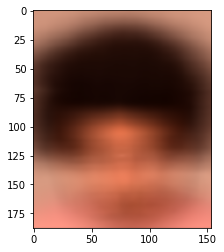

In [ ]:
# Crop a patch from the image itself to use as convolutional filters.
kernel_patch = rgb_image[:, 124:146, 75:135]

output1 = SingleChannelConvolution(rgb_image[0], kernel_patch[0])
output2 = SingleChannelConvolution(rgb_image[1], kernel_patch[1])
output3 = SingleChannelConvolution(rgb_image[2], kernel_patch[2])

# Remember that unsqueeze adds a dummy dimension at the beginning of the tensor.
print('output1', output1.unsqueeze(0).size()) 
print('output2', output2.unsqueeze(0).size())
print('output3', output3.unsqueeze(0).size())

output_image = torch.cat((output1.unsqueeze(0), 
                          output2.unsqueeze(0),
                          output3.unsqueeze(0)), 0)

output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())

print('output', output_image.size())
print('rgb_image', rgb_image.size())

plot_image(kernel_patch)
plot_image(rgb_image)
plot_image(output_image)

Here is another example. Here we pick a patch from the portion around the mouth of the person and we convolve this patch with the original image. By now we could guess that filtering (or convolving) the image with a given patch enhances the parts of the image that are similar to the given filter (weight matrix).

output1 torch.Size([1, 192, 175])
output2 torch.Size([1, 192, 175])
output3 torch.Size([1, 192, 175])
output torch.Size([3, 192, 175])
rgb_image torch.Size([3, 207, 211])


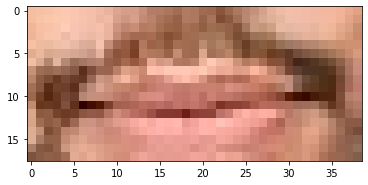

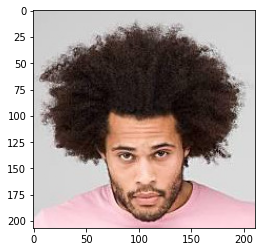

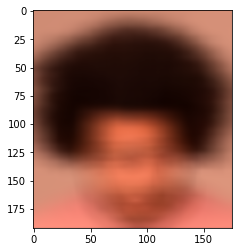

In [ ]:
# Crop a patch from the image itself to use as convolutional filters.
kernel_patch_x = rgb_image[:, 166:184, 89:128]

output1 = SingleChannelConvolution(rgb_image[0], kernel_patch_x[0])
output2 = SingleChannelConvolution(rgb_image[1], kernel_patch_x[1])
output3 = SingleChannelConvolution(rgb_image[2], kernel_patch_x[2])

# Remember that unsqueeze adds a dummy dimension at the beginning of the tensor.
print('output1', output1.unsqueeze(0).size()) 
print('output2', output2.unsqueeze(0).size())
print('output3', output3.unsqueeze(0).size())

output_image = torch.cat((output1.unsqueeze(0), 
                          output2.unsqueeze(0),
                          output3.unsqueeze(0)), 0)

output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())

print('output', output_image.size())
print('rgb_image', rgb_image.size())

plot_image(kernel_patch_x)
plot_image(rgb_image)
plot_image(output_image)

The main purpose of the above two examples is to illustrate an important behavior of convolution operators. They generally highlight the patterns in the image that resemble the kernel matrix itself. e.g. the sobel operators look like vertical or horizontal edges if you render them as images, the eyes kernel patch matrix in the first example highlighted the eyes area of the image, and the mouth example highlighted mouth-like structure.